In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [2]:
FPT_RMSE = []
FPT_MAPE = []
FPT_MAE = []

ELC_RMSE = []
ELC_MAPE = []
ELC_MAE = []

CMG_RMSE = []
CMG_MAPE = []
CMG_MAE = []

# Chia data theo tỉ lệ 7:3

## FPT-Historical Data

In [3]:
# Xem data
# Load the data
df = pd.read_csv("FPT-Historical-Data.csv", index_col='Date')


print(df)

               Price
Date                
2018-03-26   25563.3
2018-03-27   25692.8
2018-03-28   25433.8
2018-03-29   25692.8
2018-03-30   26211.0
...              ...
2024-03-18  113000.0
2024-03-19  112000.0
2024-03-20  114500.0
2024-03-21  116200.0
2024-03-22  114900.0

[2189 rows x 1 columns]


In [4]:
# 2. Đọc file dữ liệu FPT-Historical-Data và chia train test theo tỉ lệ 7:3
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]


In [5]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [6]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)


In [7]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index = df.index[-1]

# Create an array of 30 60 90 consecutive integers starting from the index after the last data point
next_30_days_index = np.arange(last_index + 1, last_index + 31)
next_60_days_index = np.arange(last_index + 32, last_index + 61)
next_90_days_index = np.arange(last_index + 62, last_index + 91)

# Reshape the indices for prediction
x_next_30_days = next_30_days_index.reshape(-1, 1)
x_next_60_days = next_60_days_index.reshape(-1, 1)
x_next_90_days = next_90_days_index.reshape(-1, 1)

# Predict the closing prices for the next 30 60 and 90 days
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)


last_data_30 = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
last_data_60 = pd.RangeIndex(start=last_index+31, stop=last_index+60, step=1)
last_data_90 = pd.RangeIndex(start=last_index+61 , stop=last_index+90, step=1)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[106701.6060833  106746.2238372  106790.84159109 106835.45934498
 106880.07709887 106924.69485276 106969.31260665 107013.93036054
 107058.54811443 107103.16586832 107147.78362221 107192.4013761
 107237.01912999 107281.63688388 107326.25463777 107370.87239166
 107415.49014555 107460.10789944 107504.72565333 107549.34340722
 107593.96116111 107638.578915   107683.19666889 107727.81442278
 107772.43217667 107817.04993056 107861.66768445 107906.28543834
 107950.90319224 107995.52094613]


In [8]:
# 7. Đánh giá độ chính xác test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape, '%')

# Calculate MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

FPT_RMSE.append(round(test_rmse,4))
FPT_MAPE.append(round(test_mape,4))
FPT_MAE.append(round(test_mae,4))


Testing RMSE: 9187.284503633331
Testing MAPE: 9.86014464253583 %
Testing MAE: 8202.381221137302


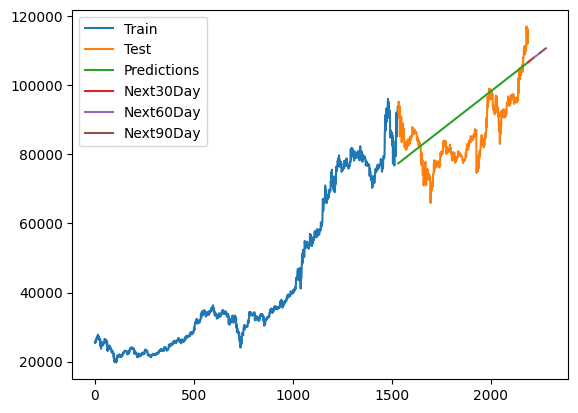

In [9]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_30,y_next_30_days)
plt.plot(last_data_60,y_next_60_days)
plt.plot(last_data_90,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day','Next60Day','Next90Day'])
plt.show()

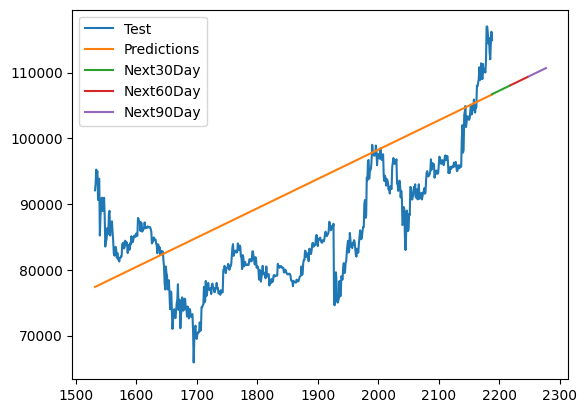

In [10]:
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_30,y_next_30_days)
plt.plot(last_data_60,y_next_60_days)
plt.plot(last_data_90,y_next_90_days)
plt.legend([ 'Test', 'Predictions','Next30Day','Next60Day','Next90Day'])
plt.show()

## ELC-Historical Data

In [11]:
# Xem data
# Load the data
df = pd.read_csv("ELC-Historical-Data.csv", index_col='Date')


print(df)

              Price
Date               
2018-03-26  10653.3
2018-03-27  10571.3
2018-03-28  10489.4
2018-03-29  10489.4
2018-03-30  11022.0
...             ...
2024-03-18  23400.0
2024-03-19  23900.0
2024-03-20  23700.0
2024-03-21  23600.0
2024-03-22  23450.0

[2189 rows x 1 columns]


In [12]:
# 2. Đọc file dữ liệu ELC-Historical-Data và chia train test theo tỉ lệ 7:3
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [13]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [14]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)


In [15]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index = df.index[-1]

# Create an array of 30 60 90 consecutive integers starting from the index after the last data point
next_30_days_index = np.arange(last_index + 1, last_index + 31)
next_60_days_index = np.arange(last_index + 32, last_index + 61)
next_90_days_index = np.arange(last_index + 62, last_index + 91)

# Reshape the indices for prediction
x_next_30_days = next_30_days_index.reshape(-1, 1)
x_next_60_days = next_60_days_index.reshape(-1, 1)
x_next_90_days = next_90_days_index.reshape(-1, 1)

# Predict the closing prices for the next 30 60 and 90 days
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)


last_data_30 = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
last_data_60 = pd.RangeIndex(start=last_index+31, stop=last_index+60, step=1)
last_data_90 = pd.RangeIndex(start=last_index+61 , stop=last_index+90, step=1)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[22559.75092727 22568.9779898  22578.20505234 22587.43211487
 22596.6591774  22605.88623993 22615.11330246 22624.34036499
 22633.56742752 22642.79449005 22652.02155258 22661.24861511
 22670.47567764 22679.70274017 22688.9298027  22698.15686523
 22707.38392776 22716.61099029 22725.83805282 22735.06511535
 22744.29217788 22753.51924041 22762.74630294 22771.97336548
 22781.20042801 22790.42749054 22799.65455307 22808.8816156
 22818.10867813 22827.33574066]


In [16]:
# 7. Đánh giá độ chính xác test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape, '%')

# Calculate MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

ELC_RMSE.append(round(test_rmse,4))
ELC_MAPE.append(round(test_mape,4))
ELC_MAE.append(round(test_mae,4))


Testing RMSE: 5379.322105812174
Testing MAPE: 38.02801829602204 %
Testing MAE: 4616.681245908604


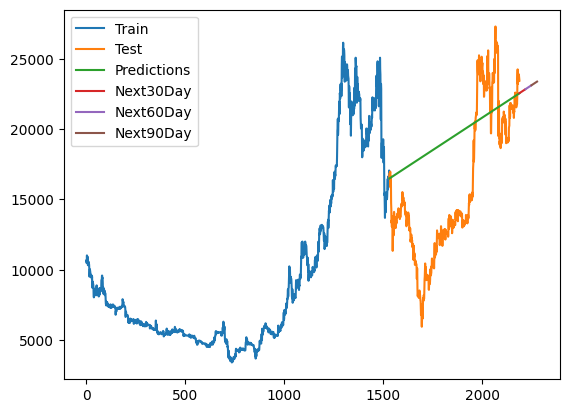

In [17]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_30,y_next_30_days)
plt.plot(last_data_60,y_next_60_days)
plt.plot(last_data_90,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day','Next60Day','Next90Day'])
plt.show()

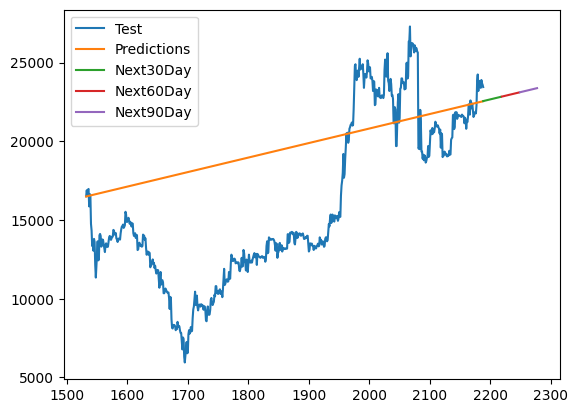

In [18]:
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_30,y_next_30_days)
plt.plot(last_data_60,y_next_60_days)
plt.plot(last_data_90,y_next_90_days)
plt.legend([ 'Test', 'Predictions','Next30Day','Next60Day','Next90Day'])
plt.show()

## CMG-Historical Data

In [19]:
# Xem data
# Load the data
df = pd.read_csv("CMG-Historical-Data.csv", index_col='Date')


print(df)

              Price
Date               
2018-03-26  17903.3
2018-03-27  18497.9
2018-03-28  18960.3
2018-03-29  19819.1
2018-03-30  20876.1
...             ...
2024-03-18  40950.0
2024-03-19  39700.0
2024-03-20  40050.0
2024-03-21  39800.0
2024-03-22  39800.0

[2189 rows x 1 columns]


In [20]:
# 2. Đọc file ELC-Historical-Data và chia train test theo tỉ lệ 7:3
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [21]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [22]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)


In [23]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index = df.index[-1]

# Create an array of 30 60 90 consecutive integers starting from the index after the last data point
next_30_days_index = np.arange(last_index + 1, last_index + 31)
next_60_days_index = np.arange(last_index + 32, last_index + 61)
next_90_days_index = np.arange(last_index + 62, last_index + 91)

# Reshape the indices for prediction
x_next_30_days = next_30_days_index.reshape(-1, 1)
x_next_60_days = next_60_days_index.reshape(-1, 1)
x_next_90_days = next_90_days_index.reshape(-1, 1)

# Predict the closing prices for the next 30 60 and 90 days
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)


last_data_30 = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
last_data_60 = pd.RangeIndex(start=last_index+31, stop=last_index+60, step=1)
last_data_90 = pd.RangeIndex(start=last_index+61 , stop=last_index+90, step=1)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)


Predicted closing prices for the next 30 days:
[60168.82027897 60190.857866   60212.89545303 60234.93304006
 60256.97062709 60279.00821412 60301.04580115 60323.08338818
 60345.1209752  60367.15856223 60389.19614926 60411.23373629
 60433.27132332 60455.30891035 60477.34649738 60499.3840844
 60521.42167143 60543.45925846 60565.49684549 60587.53443252
 60609.57201955 60631.60960658 60653.64719361 60675.68478063
 60697.72236766 60719.75995469 60741.79754172 60763.83512875
 60785.87271578 60807.91030281]


In [24]:
# 7. Đánh giá độ chính xác test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape, '%')

# Calculate MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

CMG_RMSE.append(round(test_rmse,4))
CMG_MAPE.append(round(test_mape,4))
CMG_MAE.append(round(test_mae,4))

Testing RMSE: 11327.950306291781
Testing MAPE: 24.40069740871952 %
Testing MAE: 10398.463418474486


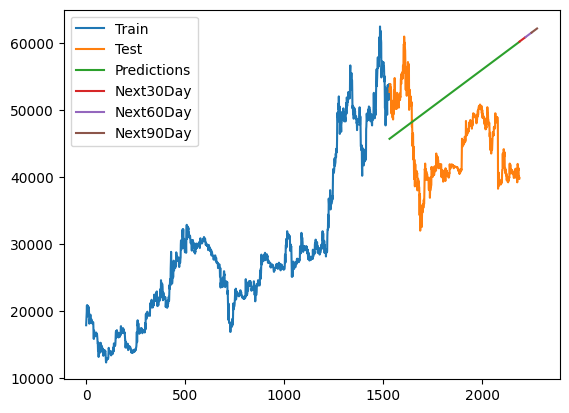

In [25]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_30,y_next_30_days)
plt.plot(last_data_60,y_next_60_days)
plt.plot(last_data_90,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day','Next60Day','Next90Day'])
plt.show()

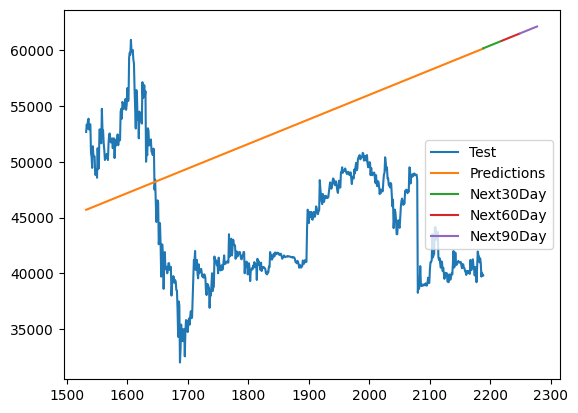

In [26]:
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_30,y_next_30_days)
plt.plot(last_data_60,y_next_60_days)
plt.plot(last_data_90,y_next_90_days)
plt.legend([ 'Test', 'Predictions','Next30Day','Next60Day','Next90Day'])
plt.show()

# Chia data theo tỉ lệ 8:2

## FPT-Historical Data

In [27]:
# Xem data
# Load the data
df = pd.read_csv("FPT-Historical-Data.csv", index_col='Date')


print(df)

               Price
Date                
2018-03-26   25563.3
2018-03-27   25692.8
2018-03-28   25433.8
2018-03-29   25692.8
2018-03-30   26211.0
...              ...
2024-03-18  113000.0
2024-03-19  112000.0
2024-03-20  114500.0
2024-03-21  116200.0
2024-03-22  114900.0

[2189 rows x 1 columns]


In [28]:
# 2. Đọc file dữ liệu FPT-Historical-Data và chia train test theo tỉ lệ 8:2
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]


In [29]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [30]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)


In [31]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index = df.index[-1]

# Create an array of 30 60 90 consecutive integers starting from the index after the last data point
next_30_days_index = np.arange(last_index + 1, last_index + 31)
next_60_days_index = np.arange(last_index + 32, last_index + 61)
next_90_days_index = np.arange(last_index + 62, last_index + 91)

# Reshape the indices for prediction
x_next_30_days = next_30_days_index.reshape(-1, 1)
x_next_60_days = next_60_days_index.reshape(-1, 1)
x_next_90_days = next_90_days_index.reshape(-1, 1)

# Predict the closing prices for the next 30 60 and 90 days
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)


last_data_30 = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
last_data_60 = pd.RangeIndex(start=last_index+31, stop=last_index+60, step=1)
last_data_90 = pd.RangeIndex(start=last_index+61 , stop=last_index+90, step=1)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[105393.79171771 105437.56859437 105481.34547103 105525.1223477
 105568.89922436 105612.67610102 105656.45297768 105700.22985434
 105744.006731   105787.78360766 105831.56048432 105875.33736098
 105919.11423764 105962.8911143  106006.66799097 106050.44486763
 106094.22174429 106137.99862095 106181.77549761 106225.55237427
 106269.32925093 106313.10612759 106356.88300425 106400.65988091
 106444.43675757 106488.21363424 106531.9905109  106575.76738756
 106619.54426422 106663.32114088]


In [32]:
# 7. Đánh giá độ chính xác test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape, '%')

# Calculate MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

FPT_RMSE.append(round(test_rmse,4))
FPT_MAPE.append(round(test_mape,4))
FPT_MAE.append(round(test_mae,4))

Testing RMSE: 8625.273867246398
Testing MAPE: 8.96983329754484 %
Testing MAE: 7645.922989993415


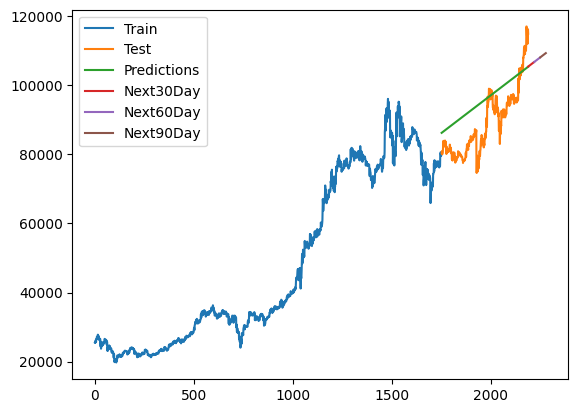

In [33]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_30,y_next_30_days)
plt.plot(last_data_60,y_next_60_days)
plt.plot(last_data_90,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day','Next60Day','Next90Day'])
plt.show()

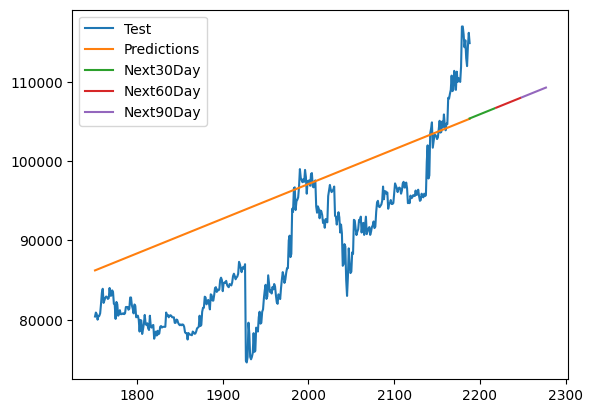

In [34]:
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_30,y_next_30_days)
plt.plot(last_data_60,y_next_60_days)
plt.plot(last_data_90,y_next_90_days)
plt.legend([ 'Test', 'Predictions','Next30Day','Next60Day','Next90Day'])
plt.show()

## ELC-Historical Data

In [35]:
# Xem data
# Load the data
df = pd.read_csv("ELC-Historical-Data.csv", index_col='Date')


print(df)

              Price
Date               
2018-03-26  10653.3
2018-03-27  10571.3
2018-03-28  10489.4
2018-03-29  10489.4
2018-03-30  11022.0
...             ...
2024-03-18  23400.0
2024-03-19  23900.0
2024-03-20  23700.0
2024-03-21  23600.0
2024-03-22  23450.0

[2189 rows x 1 columns]


In [36]:
# 2. Đọc file dữ liệu ELC-Historical-Data và chia train test theo tỉ lệ 8:2
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [37]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [38]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)


In [39]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index = df.index[-1]

# Create an array of 30 60 90 consecutive integers starting from the index after the last data point
next_30_days_index = np.arange(last_index + 1, last_index + 31)
next_60_days_index = np.arange(last_index + 32, last_index + 61)
next_90_days_index = np.arange(last_index + 62, last_index + 91)

# Reshape the indices for prediction
x_next_30_days = next_30_days_index.reshape(-1, 1)
x_next_60_days = next_60_days_index.reshape(-1, 1)
x_next_90_days = next_90_days_index.reshape(-1, 1)

# Predict the closing prices for the next 30 60 and 90 days
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)


last_data_30 = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
last_data_60 = pd.RangeIndex(start=last_index+31, stop=last_index+60, step=1)
last_data_90 = pd.RangeIndex(start=last_index+61 , stop=last_index+90, step=1)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)


Predicted closing prices for the next 30 days:
[18864.61700866 18871.58408214 18878.55115561 18885.51822908
 18892.48530255 18899.45237602 18906.41944949 18913.38652296
 18920.35359644 18927.32066991 18934.28774338 18941.25481685
 18948.22189032 18955.18896379 18962.15603726 18969.12311074
 18976.09018421 18983.05725768 18990.02433115 18996.99140462
 19003.95847809 19010.92555157 19017.89262504 19024.85969851
 19031.82677198 19038.79384545 19045.76091892 19052.72799239
 19059.69506587 19066.66213934]


In [40]:
# 7. Đánh giá độ chính xác test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape, '%')

# Calculate MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

ELC_RMSE.append(round(test_rmse,4))
ELC_MAPE.append(round(test_mape,4))
ELC_MAE.append(round(test_mae,4))

Testing RMSE: 4183.679597548879
Testing MAPE: 21.685402859419955 %
Testing MAE: 3771.9941765202725


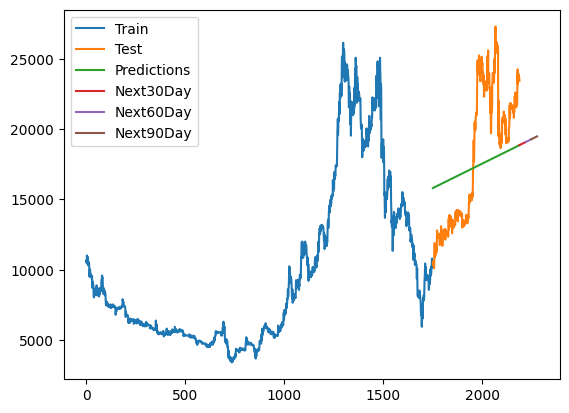

In [41]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_30,y_next_30_days)
plt.plot(last_data_60,y_next_60_days)
plt.plot(last_data_90,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day','Next60Day','Next90Day'])
plt.show()

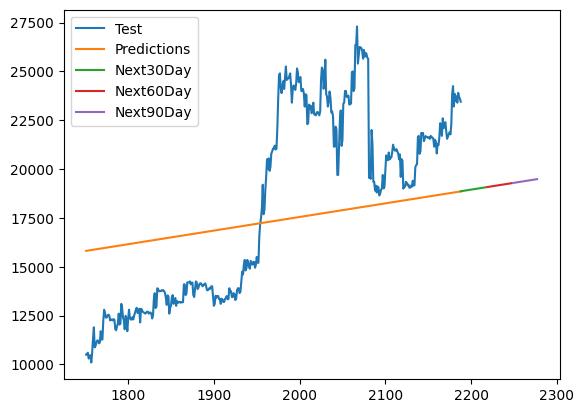

In [42]:
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_30,y_next_30_days)
plt.plot(last_data_60,y_next_60_days)
plt.plot(last_data_90,y_next_90_days)
plt.legend([ 'Test', 'Predictions','Next30Day','Next60Day','Next90Day'])
plt.show()

## CMG-Historical Data

In [43]:
# Xem data
# Load the data
df = pd.read_csv("CMG-Historical-Data.csv", index_col='Date')

print(df)

              Price
Date               
2018-03-26  17903.3
2018-03-27  18497.9
2018-03-28  18960.3
2018-03-29  19819.1
2018-03-30  20876.1
...             ...
2024-03-18  40950.0
2024-03-19  39700.0
2024-03-20  40050.0
2024-03-21  39800.0
2024-03-22  39800.0

[2189 rows x 1 columns]


In [44]:
# 2. Đọc file ELC-Historical-Data và chia train test theo tỉ lệ 8:2
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [45]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [46]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)


In [47]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index = df.index[-1]

# Create an array of 30 60 90 consecutive integers starting from the index after the last data point
next_30_days_index = np.arange(last_index + 1, last_index + 31)
next_60_days_index = np.arange(last_index + 32, last_index + 61)
next_90_days_index = np.arange(last_index + 62, last_index + 91)

# Reshape the indices for prediction
x_next_30_days = next_30_days_index.reshape(-1, 1)
x_next_60_days = next_60_days_index.reshape(-1, 1)
x_next_90_days = next_90_days_index.reshape(-1, 1)

# Predict the closing prices for the next 30 60 and 90 days
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)


last_data_30 = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
last_data_60 = pd.RangeIndex(start=last_index+31, stop=last_index+60, step=1)
last_data_90 = pd.RangeIndex(start=last_index+61 , stop=last_index+90, step=1)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)


Predicted closing prices for the next 30 days:
[58872.65924973 58893.86423438 58915.06921903 58936.27420368
 58957.47918832 58978.68417297 58999.88915762 59021.09414227
 59042.29912691 59063.50411156 59084.70909621 59105.91408086
 59127.1190655  59148.32405015 59169.5290348  59190.73401944
 59211.93900409 59233.14398874 59254.34897339 59275.55395803
 59296.75894268 59317.96392733 59339.16891198 59360.37389662
 59381.57888127 59402.78386592 59423.98885056 59445.19383521
 59466.39881986 59487.60380451]


In [48]:
# 7. Đánh giá độ chính xác test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape, '%')

# Calculate MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

CMG_RMSE.append(round(test_rmse,4))
CMG_MAPE.append(round(test_mape,4))
CMG_MAE.append(round(test_mae,4))


Testing RMSE: 11345.032323438007
Testing MAPE: 24.712483518870716 %
Testing MAE: 10453.455073991088


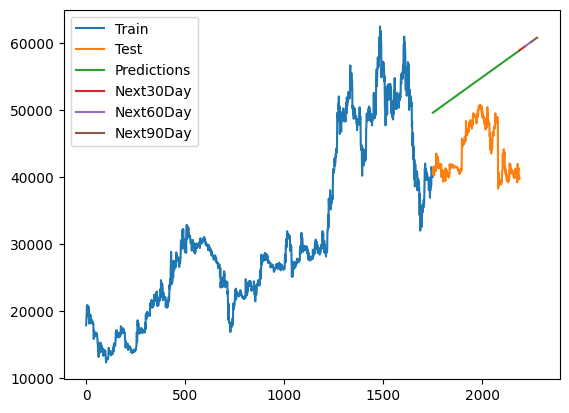

In [49]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_30,y_next_30_days)
plt.plot(last_data_60,y_next_60_days)
plt.plot(last_data_90,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day','Next60Day','Next90Day'])
plt.show()

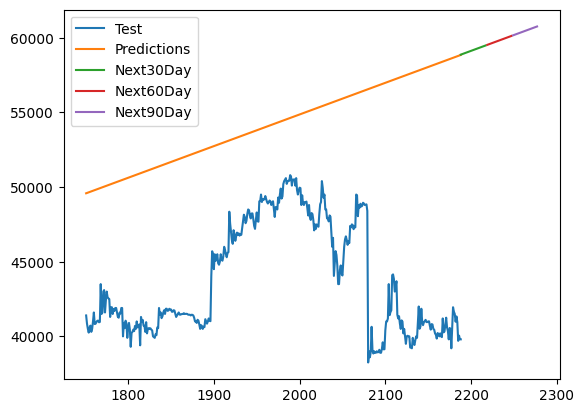

In [50]:
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_30,y_next_30_days)
plt.plot(last_data_60,y_next_60_days)
plt.plot(last_data_90,y_next_90_days)
plt.legend([ 'Test', 'Predictions','Next30Day','Next60Day','Next90Day'])
plt.show()

# Chia data theo tỉ lệ 9:1

## FPT-Historical Data

In [51]:
# Xem data
# Load the data
df = pd.read_csv("FPT-Historical-Data.csv", index_col='Date')


print(df)

               Price
Date                
2018-03-26   25563.3
2018-03-27   25692.8
2018-03-28   25433.8
2018-03-29   25692.8
2018-03-30   26211.0
...              ...
2024-03-18  113000.0
2024-03-19  112000.0
2024-03-20  114500.0
2024-03-21  116200.0
2024-03-22  114900.0

[2189 rows x 1 columns]


In [52]:
# 2. Đọc file dữ liệu FPT-Historical-Data và chia train test theo tỉ lệ 9:1
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.9 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]


In [53]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [54]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)


In [55]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index = df.index[-1]

# Create an array of 30 60 90 consecutive integers starting from the index after the last data point
next_30_days_index = np.arange(last_index + 1, last_index + 31)
next_60_days_index = np.arange(last_index + 32, last_index + 61)
next_90_days_index = np.arange(last_index + 62, last_index + 91)

# Reshape the indices for prediction
x_next_30_days = next_30_days_index.reshape(-1, 1)
x_next_60_days = next_60_days_index.reshape(-1, 1)
x_next_90_days = next_90_days_index.reshape(-1, 1)

# Predict the closing prices for the next 30 60 and 90 days
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)


last_data_30 = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
last_data_60 = pd.RangeIndex(start=last_index+31, stop=last_index+60, step=1)
last_data_90 = pd.RangeIndex(start=last_index+61 , stop=last_index+90, step=1)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)


Predicted closing prices for the next 30 days:
[100723.7554328  100764.55399513 100805.35255745 100846.15111978
 100886.94968211 100927.74824444 100968.54680677 101009.3453691
 101050.14393143 101090.94249376 101131.74105609 101172.53961842
 101213.33818075 101254.13674308 101294.93530541 101335.73386774
 101376.53243007 101417.3309924  101458.12955473 101498.92811706
 101539.72667939 101580.52524172 101621.32380405 101662.12236638
 101702.92092871 101743.71949104 101784.51805337 101825.3166157
 101866.11517803 101906.91374036]


In [56]:
# 7. Đánh giá độ chính xác test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape, '%')

# Calculate MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

FPT_RMSE.append(round(test_rmse,4))
FPT_MAPE.append(round(test_mape,4))
FPT_MAE.append(round(test_mae,4))


Testing RMSE: 5506.7583684138535
Testing MAPE: 4.316237641082321 %
Testing MAE: 4276.720680896711


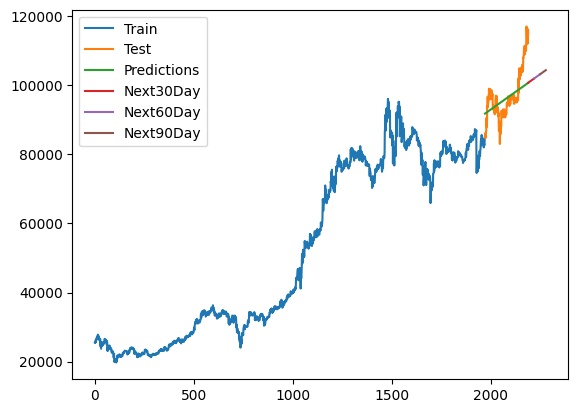

In [57]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_30,y_next_30_days)
plt.plot(last_data_60,y_next_60_days)
plt.plot(last_data_90,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day','Next60Day','Next90Day'])
plt.show()

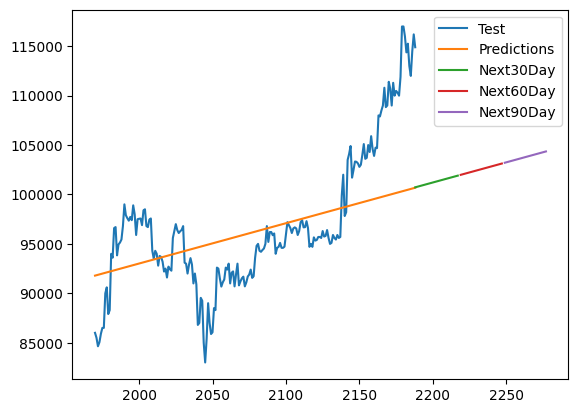

In [58]:
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_30,y_next_30_days)
plt.plot(last_data_60,y_next_60_days)
plt.plot(last_data_90,y_next_90_days)
plt.legend([ 'Test', 'Predictions','Next30Day','Next60Day','Next90Day'])
plt.show()

## ELC-Historical Data

In [59]:
# Xem data
# Load the data
df = pd.read_csv("ELC-Historical-Data.csv", index_col='Date')


print(df)

              Price
Date               
2018-03-26  10653.3
2018-03-27  10571.3
2018-03-28  10489.4
2018-03-29  10489.4
2018-03-30  11022.0
...             ...
2024-03-18  23400.0
2024-03-19  23900.0
2024-03-20  23700.0
2024-03-21  23600.0
2024-03-22  23450.0

[2189 rows x 1 columns]


In [60]:
# 2. Đọc file dữ liệu ELC-Historical-Data và chia train test theo tỉ lệ 9:1
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.9 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [61]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [62]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)


In [63]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index = df.index[-1]

# Create an array of 30 60 90 consecutive integers starting from the index after the last data point
next_30_days_index = np.arange(last_index + 1, last_index + 31)
next_60_days_index = np.arange(last_index + 32, last_index + 61)
next_90_days_index = np.arange(last_index + 62, last_index + 91)

# Reshape the indices for prediction
x_next_30_days = next_30_days_index.reshape(-1, 1)
x_next_60_days = next_60_days_index.reshape(-1, 1)
x_next_90_days = next_90_days_index.reshape(-1, 1)

# Predict the closing prices for the next 30 60 and 90 days
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)


last_data_30 = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
last_data_60 = pd.RangeIndex(start=last_index+31, stop=last_index+60, step=1)
last_data_90 = pd.RangeIndex(start=last_index+61 , stop=last_index+90, step=1)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)


Predicted closing prices for the next 30 days:
[17498.80081105 17504.90592423 17511.01103742 17517.1161506
 17523.22126379 17529.32637697 17535.43149016 17541.53660334
 17547.64171653 17553.74682971 17559.8519429  17565.95705608
 17572.06216927 17578.16728245 17584.27239564 17590.37750882
 17596.48262201 17602.58773519 17608.69284838 17614.79796156
 17620.90307475 17627.00818793 17633.11330112 17639.2184143
 17645.32352749 17651.42864067 17657.53375386 17663.63886704
 17669.74398023 17675.84909341]


In [64]:
# 7. Đánh giá độ chính xác test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape, '%')

# Calculate MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

ELC_RMSE.append(round(test_rmse,4))
ELC_MAPE.append(round(test_mape,4))
ELC_MAE.append(round(test_mae,4))


Testing RMSE: 5999.263112443531
Testing MAPE: 24.136333086728005 %
Testing MAE: 5563.346114189305


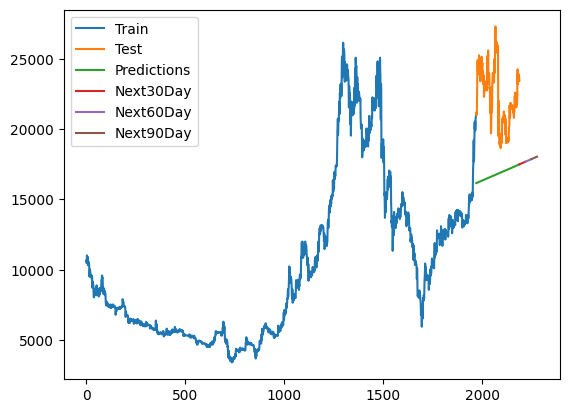

In [65]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_30,y_next_30_days)
plt.plot(last_data_60,y_next_60_days)
plt.plot(last_data_90,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day','Next60Day','Next90Day'])
plt.show()

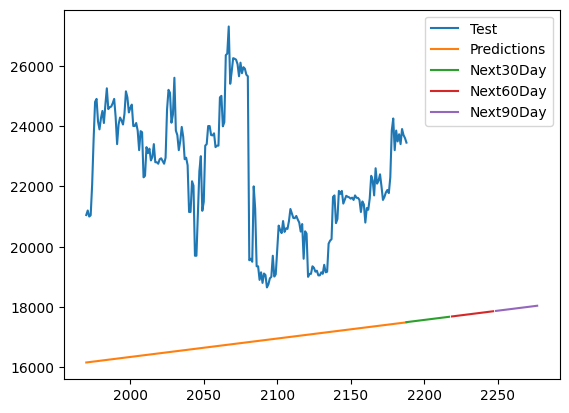

In [66]:
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_30,y_next_30_days)
plt.plot(last_data_60,y_next_60_days)
plt.plot(last_data_90,y_next_90_days)
plt.legend([ 'Test', 'Predictions','Next30Day','Next60Day','Next90Day'])
plt.show()

## CMG-Historical Data

In [67]:
# Xem data
# Load the data
df = pd.read_csv("CMG-Historical-Data.csv", index_col='Date')

print(df)

              Price
Date               
2018-03-26  17903.3
2018-03-27  18497.9
2018-03-28  18960.3
2018-03-29  19819.1
2018-03-30  20876.1
...             ...
2024-03-18  40950.0
2024-03-19  39700.0
2024-03-20  40050.0
2024-03-21  39800.0
2024-03-22  39800.0

[2189 rows x 1 columns]


In [68]:
# 2. Đọc file ELC-Historical-Data và chia train test theo tỉ lệ 9:1
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.9 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [69]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [70]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)


In [71]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index = df.index[-1]

# Create an array of 30 60 90 consecutive integers starting from the index after the last data point
next_30_days_index = np.arange(last_index + 1, last_index + 31)
next_60_days_index = np.arange(last_index + 32, last_index + 61)
next_90_days_index = np.arange(last_index + 62, last_index + 91)

# Reshape the indices for prediction
x_next_30_days = next_30_days_index.reshape(-1, 1)
x_next_60_days = next_60_days_index.reshape(-1, 1)
x_next_90_days = next_90_days_index.reshape(-1, 1)

# Predict the closing prices for the next 30 60 and 90 days
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)


last_data_30 = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
last_data_60 = pd.RangeIndex(start=last_index+31, stop=last_index+60, step=1)
last_data_90 = pd.RangeIndex(start=last_index+61 , stop=last_index+90, step=1)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[54772.12615716 54790.73155348 54809.33694979 54827.94234611
 54846.54774243 54865.15313874 54883.75853506 54902.36393137
 54920.96932769 54939.57472401 54958.18012032 54976.78551664
 54995.39091296 55013.99630927 55032.60170559 55051.2071019
 55069.81249822 55088.41789454 55107.02329085 55125.62868717
 55144.23408348 55162.8394798  55181.44487612 55200.05027243
 55218.65566875 55237.26106506 55255.86646138 55274.4718577
 55293.07725401 55311.68265033]


In [72]:
# 7. Đánh giá độ chính xác test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape, '%')

# Calculate MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

CMG_RMSE.append(round(test_rmse,4))
CMG_MAPE.append(round(test_mape,4))
CMG_MAE.append(round(test_mae,4))


Testing RMSE: 9848.326567724615
Testing MAPE: 20.128046479281625 %
Testing MAE: 8372.79740257326


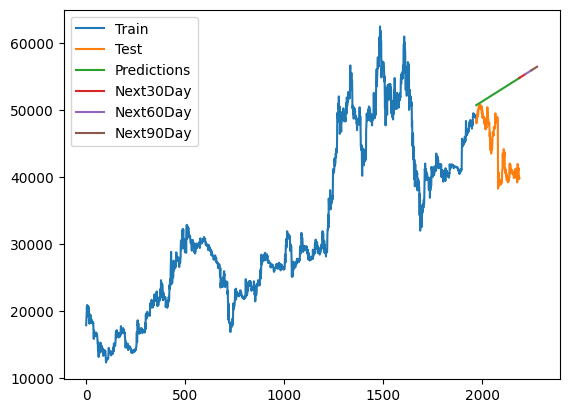

In [73]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_30,y_next_30_days)
plt.plot(last_data_60,y_next_60_days)
plt.plot(last_data_90,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day','Next60Day','Next90Day'])
plt.show()

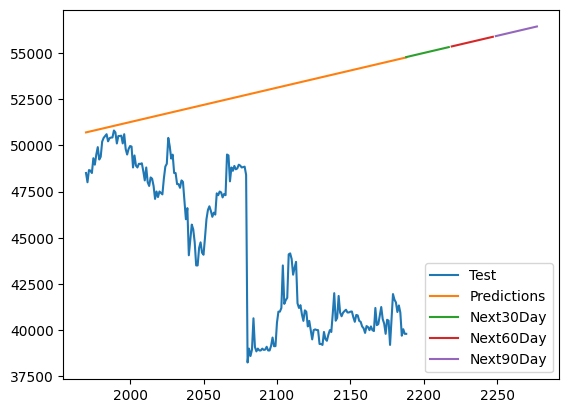

In [74]:
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_30,y_next_30_days)
plt.plot(last_data_60,y_next_60_days)
plt.plot(last_data_90,y_next_90_days)
plt.legend([ 'Test', 'Predictions','Next30Day','Next60Day','Next90Day'])
plt.show()

# Kết quả:

In [75]:
# Function to print the arrays in the required format
def print_metrics(name, RMSE, MAPE, MAE):
    print(f"{name}: ")
    print(f"{'RMSE':<15}{'MAPE':<10}{'MAE':<10}")
    for i in range(len(RMSE)):
        print(f"{RMSE[i]:<15}{MAPE[i]:<10}{MAE[i]:<10}")
    print()  # New line for separation

# Print the metrics for FPT, ELC, and CMG
print_metrics("FPT", FPT_RMSE, FPT_MAPE, FPT_MAE)
print_metrics("ELC", ELC_RMSE, ELC_MAPE, ELC_MAE)
print_metrics("CMG", CMG_RMSE, CMG_MAPE, CMG_MAE)

FPT: 
RMSE           MAPE      MAE       
9187.2845      9.8601    8202.3812 
8625.2739      8.9698    7645.923  
5506.7584      4.3162    4276.7207 

ELC: 
RMSE           MAPE      MAE       
5379.3221      38.028    4616.6812 
4183.6796      21.6854   3771.9942 
5999.2631      24.1363   5563.3461 

CMG: 
RMSE           MAPE      MAE       
11327.9503     24.4007   10398.4634
11345.0323     24.7125   10453.4551
9848.3266      20.128    8372.7974 

